<h1>FAMILY INCOME AND EXPENDITURE DATA ANALYSIS</h1>

<h3>COVER: Regions in Philippines</h3>
<hr>
<h4>ANALYSTS: John Benedict Quijano & Dennis Karl Domanais</h4>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading CSV file into Pandas Dataframe

df = pd.read_csv("./datasets/Family Income and Expenditure.csv")

<h2>Regions Dataframes</h2>

In [3]:
#Making another dataframe from the main dataframe

NCR = df[df['Region'] == 'NCR']
IVA_df = df[df["Region"] == 'IVA - CALABARZON']

<strong><h3>Insight No. 1</h3></strong>

<h5>Total Household Income per Region with Main Source of Income (Wage/Salaries)</h5>
<hr>
<p>The National Capital Region (NCR) has the highest total Household Income from Wage/Salary as the main source of income in all regions with the total of <strong>1,134,428,728</strong> which is 20.8% of the Total Household Income here in the Philippines.</p>

In [4]:
insight1 = df[df['Main Source of Income'] == 'Wage/Salaries'].groupby('Region')['Total Household Income'].sum().sort_index()

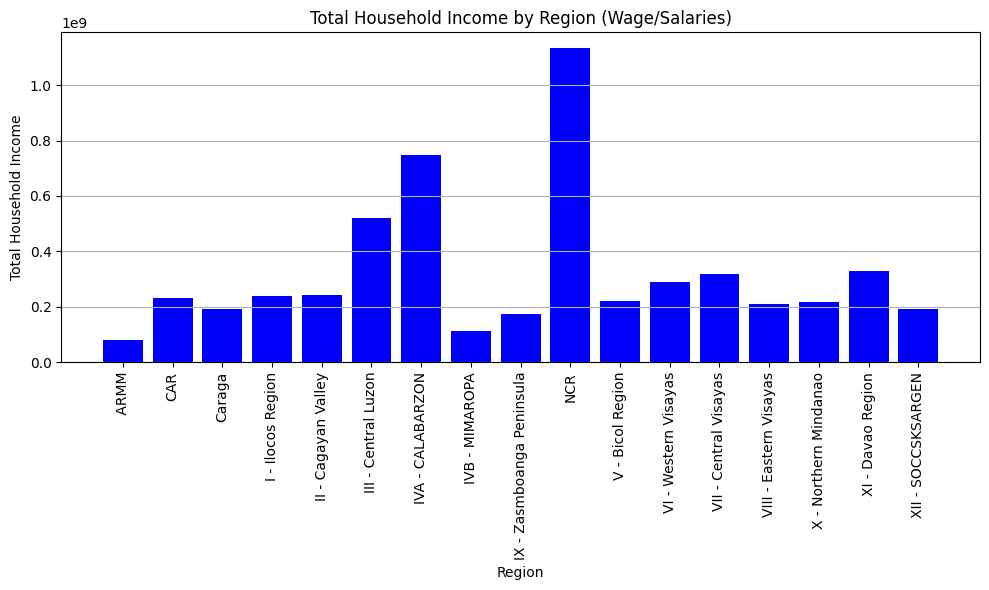

In [5]:
#INSIGHT 1 Visualization

plt.figure(figsize=(10, 6))
plt.bar(insight1.index, insight1.values, color='blue')
plt.title('Total Household Income by Region (Wage/Salaries)')
plt.xlabel('Region')
plt.ylabel('Total Household Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<strong><h3>Insight No. 2</h3></strong>

<h5>Total Household Income per Region with Main Source of Income (Enterpreneurial Activities)</h5>
<hr>
<p>The National Capital Region (NCR) has the highest total Household Income from Enterpreneurial Activities as the main source of income in all regions with the total of <strong>242,387,872</strong> which is 11.0% of the Total Household Income here in the Philippines.</p>

In [6]:
insight2 = df[df['Main Source of Income'] == 'Enterpreneurial Activities'].groupby('Region')['Total Household Income'].sum().sort_index()

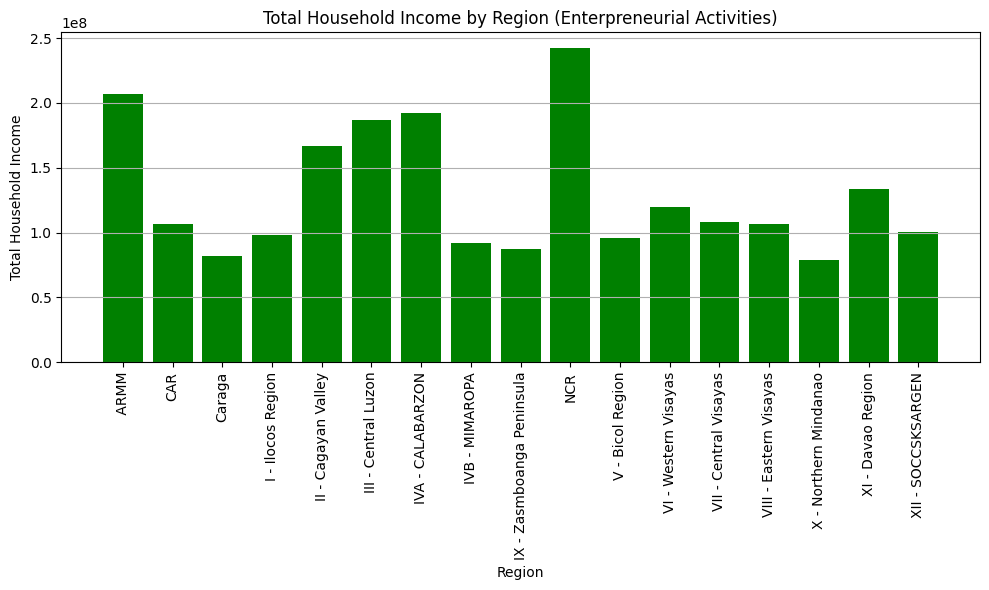

In [7]:
#INSIGHT 2 Visualization

plt.figure(figsize=(10, 6))
plt.bar(insight2.index, insight2.values, color='green')
plt.title('Total Household Income by Region (Enterpreneurial Activities)')
plt.xlabel('Region')
plt.ylabel('Total Household Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<strong><h3>Insight No. 3</h3></strong>

<h5>Total Household Income per Region with Main Source of Income (Other sources of Income)</h5>
<hr>
<p>The National Capital Region (NCR) has the highest total Household Income of Other sources as the main source of income in all regions with the total of <strong>361,342,888</strong> which is 13.7% of the Total Household Income here in the Philippines.</p>

In [8]:
insight3 = df[df['Main Source of Income'] == 'Other sources of Income'].groupby('Region')['Total Household Income'].sum().sort_index()

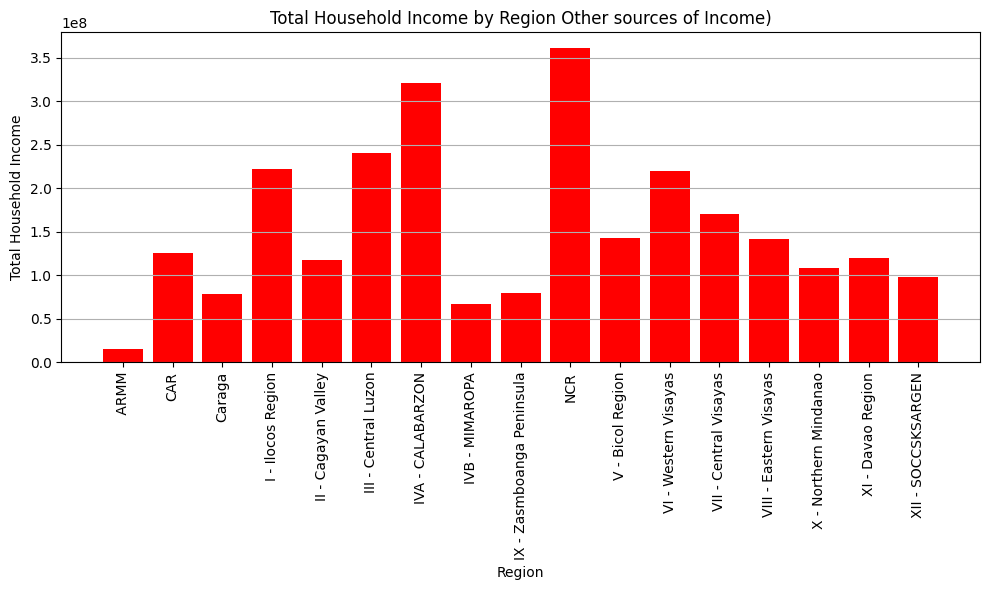

In [9]:
#INSIGHT 3 Visualization

plt.figure(figsize=(10, 6))
plt.bar(insight3.index, insight3.values, color='red')
plt.title('Total Household Income by Region Other sources of Income)')
plt.xlabel('Region')
plt.ylabel('Total Household Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<strong><h3>Insight No. 4</h3></strong>

<h5>Middle Value of Household Income in NCR</h5>
<hr>
<p>The Middle Value of Household Income in NCR is <strong>312,275</strong></p>

In [10]:
NCR['Total Household Income'].median()

np.float64(312275.0)

<strong><h3>Insight No. 5</h3></strong>

<h5>Distribution of Households in NCR</h5>
<hr>
<p>Most of the common household in NCR are <strong>Single Family</strong> with <strong>69.3%</strong> of household with the total count of <strong>2,862</strong> out of 4,130 household that's been recorded.</p>

In [11]:
insight5 = NCR['Type of Household'].value_counts().reset_index()
insight5

,Type of Household,count
0,Single Family,2862
1,Extended Family,1245
2,Two or More Nonrelated Persons/Members,23


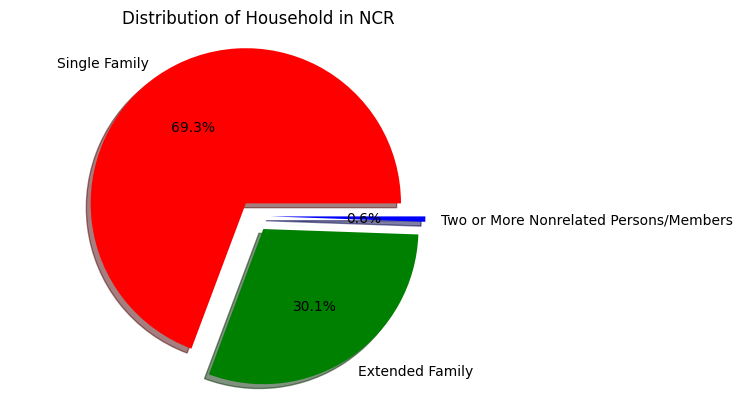

In [12]:
#INSIGHT 5 Visualization

insight5.columns = ['Type of Household', 'Count']

explode = [0.1] + [0.1] * (len(insight5) - 1)

plt.pie(
    insight5['Count'],
    labels=insight5['Type of Household'],
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    colors=['red', 'green', 'blue']
)
plt.title('Distribution of Household in NCR')
plt.axis('equal')
plt.show()

<strong><h3>Insight No. 6</h3></strong>

<h5>Type of Work of the Household Head in NCR</h5>
<hr>
<p></p>

In [13]:
insight6 = NCR['Household Head Class of Worker'].value_counts().sort_index()
insight6

Household Head Class of Worker
Employer in own family-operated farm or business               112
Self-employed wihout any employee                              728
Worked for government/government corporation                   299
Worked for private establishment                              1799
Worked for private household                                   153
Worked with pay in own family-operated farm or business          1
Worked without pay in own family-operated farm or business      17
Name: count, dtype: int64

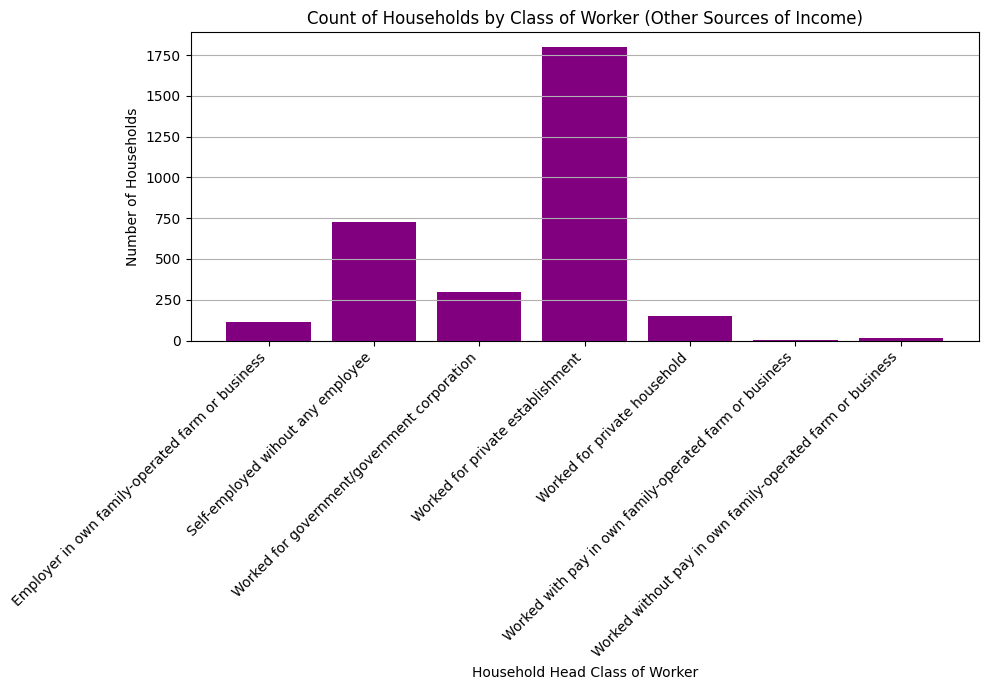

In [14]:
insight6.columns = ['Household Head Class of Worker', 'Count']

plt.figure(figsize=(10, 7))
plt.bar(insight6.index, insight6.values, color='purple')

plt.title('Count of Households by Class of Worker (Other Sources of Income)')
plt.xlabel('Household Head Class of Worker')
plt.ylabel('Number of Households')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<strong><h3>Insight No. 7</h3></strong>

<h5>Teens as Household Head in NCR who belongs in Single Family</h5>
<hr>
<p>There are <strong>8 teenagers</strong> who are Household Heads in NCR, mostly are <strong>Male</strong> and <strong>1 of them was Married</strong>.</p>

In [15]:
insight7_filter = NCR[
(NCR['Household Head Age'] <= 19) &
(NCR['Type of Household'] == 'Single Family')
]

insight7 = insight7_filter.groupby(['Household Head Sex', 'Household Head Marital Status']).size()
insight7.unstack()

Household Head Marital Status,Married,Single
Household Head Sex,,
Female,NaN,2.0
Male,1.0,6.0


<strong><h3>Insight No. 8</h3></strong>

<h5>Expenditures in NCR</h5>
<hr>
<p>Households in NCR spend most of their incomes on <strong>Housing and Water expenses</strong> with <strong>384,751,25</strong>4 which is 26.19% of 1,468,673,368 (Total value of all combined expenses).</p>

In [16]:
#Calling specific columns
insight8_col = NCR.iloc[:, 5:23]

insight8 = insight8_col.sum()

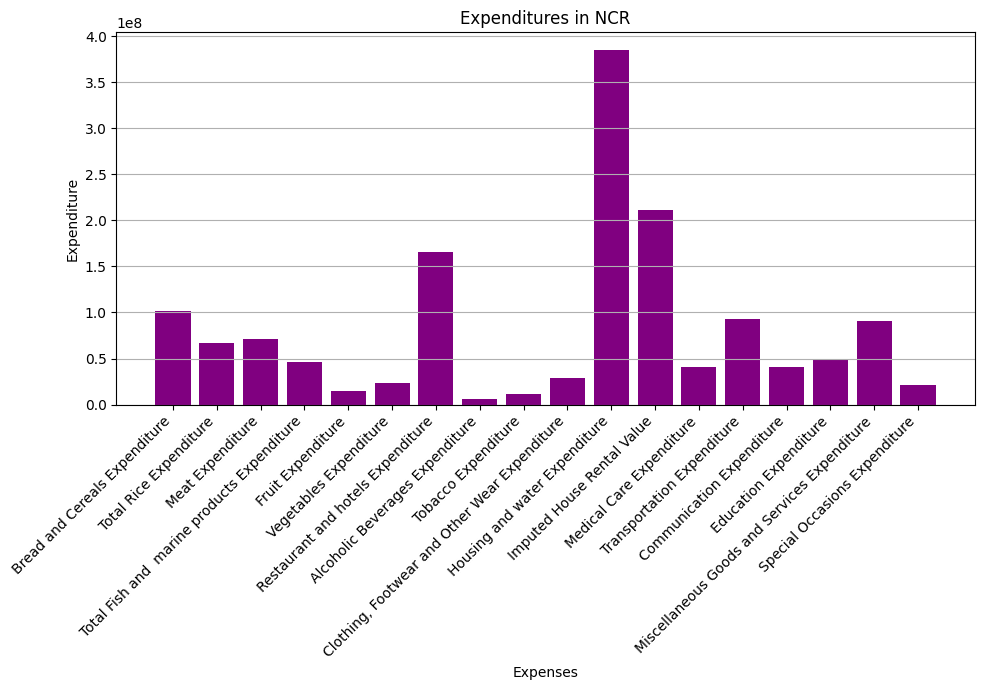

In [17]:
#INSIGHT 8 Visualization

plt.figure(figsize=(10, 7))
plt.bar(insight8.index, insight8.values, color='purple')

plt.title('Expenditures in NCR')
plt.xlabel('Expenses')
plt.ylabel('Expenditure')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<strong><h3>Insight No. 9</h3></strong>

<h5>Household Head with Job or Business in NCR</h5>
<hr>
<p>75.27% of the Household Heads in NCR has a Job or Business as their source of income.</p>

In [18]:
insight9 = NCR['Household Head Job or Business Indicator'].value_counts().sort_index()
insight9

Household Head Job or Business Indicator
No Job/Business      1021
With Job/Business    3109
Name: count, dtype: int64

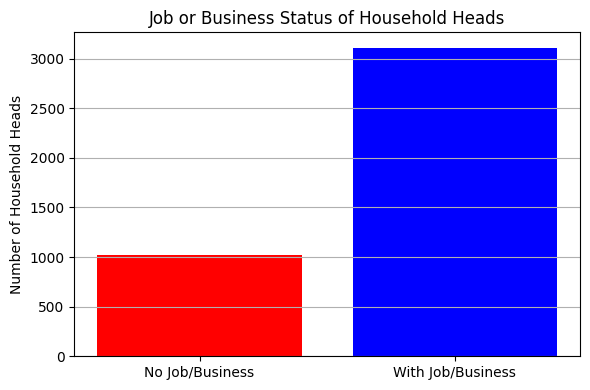

In [19]:
insight9.columns = ['Household Head Job or Business Indicator', 'Count']

plt.figure(figsize=(6, 4))

plt.bar(insight9.index, insight9.values, color=['red', 'blue'])
plt.title('Job or Business Status of Household Heads')
plt.ylabel('Number of Household Heads')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<strong><h3>Insight No. 10</h3></strong>

<h5>Highest Grade Completed by the Household Head in NCR</h5>
<hr>
<p>The median total food expenditure among households is <strong>₱115,650.50</strong> which means half of them spend less than that amount while the other half spend more. </p>

In [20]:
insight10 = NCR['Total Food Expenditure'].median()

In [21]:
insight10

np.float64(115650.5)

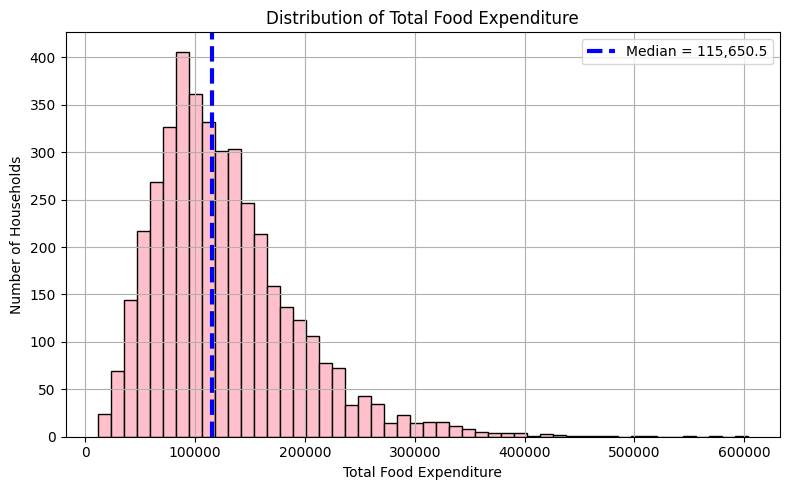

In [22]:
#INSIGHT 10 Visualization

plt.figure(figsize=(8, 5))
plt.hist(NCR['Total Food Expenditure'], bins=50, color='pink', edgecolor='black')
plt.axvline(insight10, color='blue', linestyle='dashed', linewidth=3, label=f'Median = {insight10:,.1f}')

plt.title('Distribution of Total Food Expenditure')
plt.xlabel('Total Food Expenditure')
plt.ylabel('Number of Households')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [23]:
IVA_df['Main Source of Income']

2520               Wage/Salaries
2521               Wage/Salaries
2522               Wage/Salaries
2523               Wage/Salaries
2524     Other sources of Income
                  ...           
30625              Wage/Salaries
30626    Other sources of Income
30627              Wage/Salaries
30628    Other sources of Income
30629    Other sources of Income
Name: Main Source of Income, Length: 4162, dtype: object

In [24]:
df['Main Source of Income'].value_counts()

Main Source of Income
Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: count, dtype: int64

In [25]:
insight10_col = IVA_df.iloc[:, 5:23]
insight10 = insight8_col.sum()

In [26]:
insight10

Bread and Cereals Expenditure                    102130282
Total Rice Expenditure                            66888728
Meat Expenditure                                  71705852
Total Fish and  marine products Expenditure       45964181
Fruit Expenditure                                 14775249
Vegetables Expenditure                            23266623
Restaurant and hotels Expenditure                165348866
Alcoholic Beverages Expenditure                    5919588
Tobacco Expenditure                               11028117
Clothing, Footwear and Other Wear Expenditure     28814913
Housing and water Expenditure                    384751254
Imputed House Rental Value                       211047774
Medical Care Expenditure                          40733043
Transportation Expenditure                        93115410
Communication Expenditure                         41339058
Education Expenditure                             49649023
Miscellaneous Goods and Services Expenditure      907173

In [27]:
IVA_Grade = IVA_df[IVA_df['Household Head Highest Grade Completed'] == 'High School Graduate']

In [28]:
IVA_Occ = IVA_Grade[IVA_Grade['Household Head Occupation'] == 'General managers/managing proprietors in transportation, storage and communications']

In [29]:
IVA_Occ_Member = IVA_Occ[IVA_Occ['Total Number of Family members'] == 4]

In [30]:
avg_income_and_food = IVA_Occ_Member.groupby('Region').agg(
    Avg_Household_Income=('Total Household Income', 'mean'),
    Avg_Food_Expenditure=('Total Food Expenditure', 'mean'),
    Avg_House_Water_Expenditure=('Housing and water Expenditure', 'mean'),
).reset_index()

In [31]:
avg_income_and_food 

,Region,Avg_Household_Income,Avg_Food_Expenditure,Avg_House_Water_Expenditure
0,IVA - CALABARZON,287883.322581,100295.419355,42680.129032


<strong><h3>Insight No. 11</h3></strong>
<h5>Household Income vs Major Expenditures in IVA - CALABARZON</h5>
<hr>
<p>In IVA - CALABARZON, the average annual household income is about <strong>₱287,883.32</strong>. This income is mainly spent on essential needs such as food, housing, and water.</p>

<ul>
  <li><strong>Food Expenditure:</strong> ₱100,295.42</li>
  <li><strong>House and Water Expenditure:</strong> ₱42,680.13</li>
  <li><strong>Other Non-Food Expenses:</strong> ₱187,587.90</li>
</ul>

<p>This shows that aside from food, households also spend a significant amount on housing and water. Together, these two categories take up more than half of the total non-food expenditure.</p>

<p>This suggests that families prioritize basic living conditions, and improving access to affordable housing and utilities could help reduce financial pressure on households.</p>

In [32]:
avg_income_and_food['Non_Food_Income'] = avg_income_and_food['Avg_Household_Income'] - avg_income_and_food['Avg_Food_Expenditure'] - avg_income_and_food['Avg_House_Water_Expenditure']
avg_income_and_food.round(2)

,Region,Avg_Household_Income,Avg_Food_Expenditure,Avg_House_Water_Expenditure,Non_Food_Income
0,IVA - CALABARZON,287883.32,100295.42,42680.13,144907.77


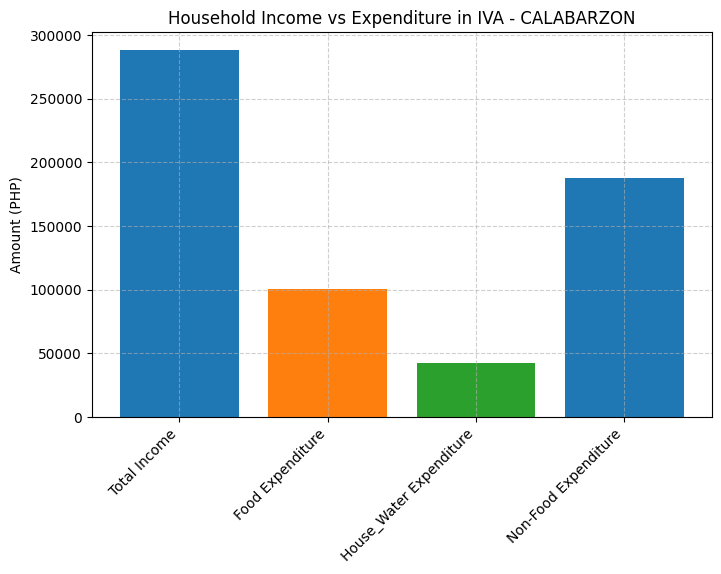

In [33]:
#Insight11 Visualiza
region = 'IVA - CALABARZON'
income = 287883.32
food_exp = 100295.42
house_water_exp = 42680.13
non_food_exp = 187587.90

plt.figure(figsize=(8, 5))
categories = ['Total Income', 'Food Expenditure','House_Water Expenditure','Non-Food Expenditure']
values = [income, food_exp, house_water_exp, non_food_exp]

plt.bar(categories, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Household Income vs Expenditure in IVA - CALABARZON')
plt.ylabel('Amount (PHP)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')

plt.show()

<strong><h3>Insight No. 12</h3></strong>
<h5>Highest Household Expenditures in Region IVA</h5>
<hr>
<p>Based on the data, the top household expenditures in Region IVA are as follows:</p>

<ol>
  <li><strong>Housing and Water</strong> – Highest expenditure</li>
  <li><strong>House Rental</strong> – Second highest</li>
  <li><strong>Restaurant and Hotel Expenses</strong> – Third highest</li>
</ol>

<p>This shows that aside from food, families in Region IVA spend a large portion of their income on shelter-related costs such as housing, water, and rent. The high spending on restaurants and hotels may indicate lifestyle habits or possibly daily reliance on dining out due to work or convenience.</p>

<p>This highlights the need to look into affordable housing programs and cost-of-living support for households in the region, especially in urban areas where rent and living expenses tend to be higher.</p>

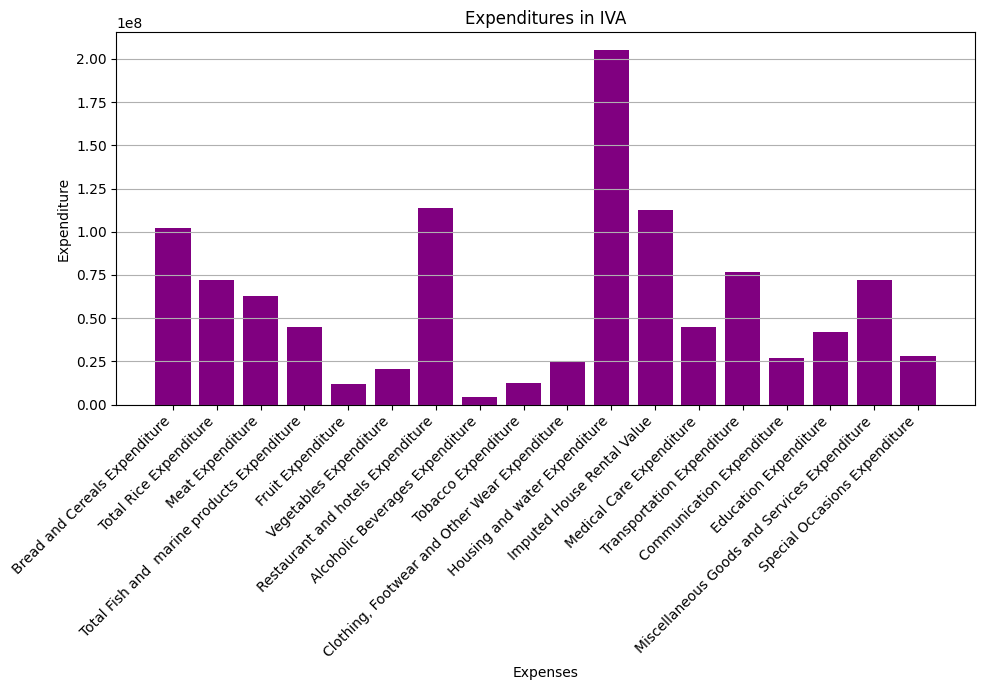

In [34]:
#INSIGHT 12 Visualization
insight12_col = IVA_df.iloc[:, 5:23]

insight12 = insight12_col.sum()
plt.figure(figsize=(10, 7))
plt.bar(insight12.index, insight12.values, color='purple')

plt.title('Expenditures in IVA')
plt.xlabel('Expenses')
plt.ylabel('Expenditure')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<strong><h3>Insight No. 13</h3></strong>
<h5>Average Income and Food Spending by Main Source of Income</h5> <hr> <p>From the grouped data by main source of income in Region IVA, the following average household incomes were observed:</p> <ol> <li><strong>Wages and Salaries</strong> – Highest average household income</li> <li><strong>Entrepreneurial Activities</strong> – Second highest</li> <li><strong>Pension and Other Sources</strong> – Lower average incomes</li> </ol> <p>Households relying on formal employment earn significantly more than those depending on pensions, remittances, or property income. This reveals that stable employment is the primary driver of household financial health in Region IVA.</p> 

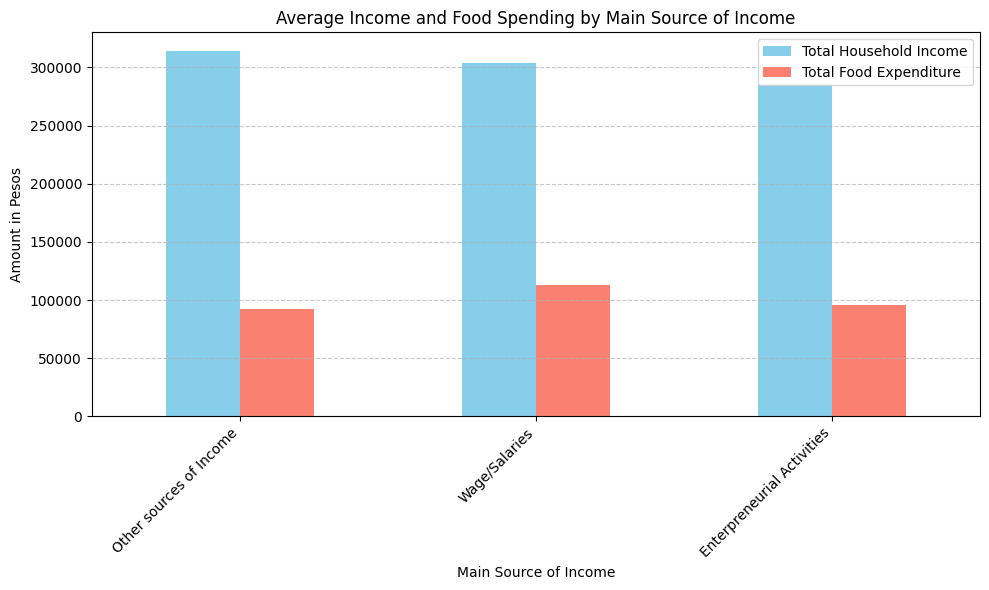

In [58]:
msi_stats = IVA_df.groupby('Main Source of Income')[['Total Household Income','Total Food Expenditure']].mean().sort_values('Total Household Income', ascending=False)
msi_stats.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Average Income and Food Spending by Main Source of Income')
plt.ylabel('Amount in Pesos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<strong><h3>Insight No. 14</h3></strong>

<h5>Average Income: Agricultural vs Non-Agricultural Households</h5> <hr> <p>Based on the grouped data from Region IVA, categorized by agricultural household status, the following observations were made regarding average household income:</p> <ol> <li><strong>Agricultural Households</strong> tend to have a distinct average income compared to non-agricultural households.</li> <li><strong>Non-Agricultural Households</strong> show a different income profile, often influenced by non-farming sources of revenue.</li> </ol> <p>This comparison highlights the economic differences between households primarily engaged in agriculture and those that are not. It suggests that the source of livelihood plays a key role in determining average household income levels in Region IVA.</p>

C:\Users\DLL-Library PC01\AppData\Local\Temp\ipykernel_8612\831159525.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  agri_stats[('Total Household Income', 'avg')].plot(kind='bar', color='green', label='Avg Income', figsize=(6,4))


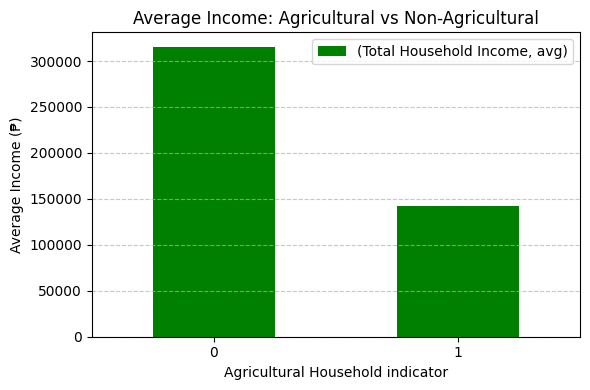

In [64]:
#Insight 14 - Visualization
agri_stats = IVA_df.groupby('Agricultural Household indicator')[['Total Household Income','Total Food Expenditure','Total Food Expenditure']].agg(['count','mean']).rename(columns={'count':'n','mean':'avg'})
agri_stats[('Total Household Income', 'avg')].plot(kind='bar', color='green', label='Avg Income', figsize=(6,4))
plt.title('Average Income: Agricultural vs Non-Agricultural')
plt.ylabel('Average Income (₱)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


<strong><h3>Insight No. 15</h3></strong>

<h5>Average Food Spending: Agricultural vs Non-Agricultural Households</h5>  
<hr>  
<p>Looking at the average amount spent on food by households in Region IVA, we see two groups:</p>  
<ol>  
  <li><strong>Agricultural Households</strong> – These families often grow some of their own food, so they may spend less money buying food.</li>  
  <li><strong>Non-Agricultural Households</strong> – These families usually buy most of their food, so they tend to spend more money on food.</li>  
</ol>  
<p>This shows that the type of work a family does affects how much they spend on food. Families involved in farming might save money by producing their own food, while others rely more on buying food from the market.</p>


C:\Users\DLL-Library PC01\AppData\Local\Temp\ipykernel_8612\1817314471.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  agri_stats[('Total Food Expenditure', 'avg')].plot(kind='bar', color='orange', label='Avg Food Spend', figsize=(6,4))


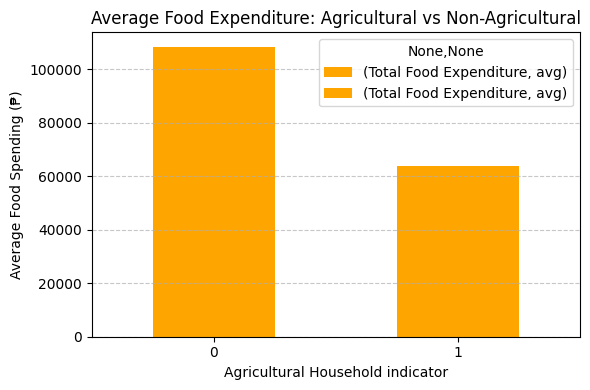

In [65]:
#Insight 15 - Visualization
agri_stats[('Total Food Expenditure', 'avg')].plot(kind='bar', color='orange', label='Avg Food Spend', figsize=(6,4))
plt.title('Average Food Expenditure: Agricultural vs Non-Agricultural')
plt.ylabel('Average Food Spending (₱)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<strong><h3>Insight No. 16</h3></strong>

<h5>Average Household Income by Education Level Groups</h5> <hr> <p>We looked at how the education level of the household head affects the average income of families in Region IVA. To make it simpler, we grouped the many education levels into five main categories:</p> <ol> <li><strong>No Formal Education</strong> – Those who didn’t complete any school.</li> <li><strong>Elementary Level</strong> – Completed elementary grades or graduated elementary school.</li> <li><strong>High School Level</strong> – Attended or graduated high school.</li> <li><strong>College Level</strong> – Attended or graduated college.</li> <li><strong>Technical/Vocational & Postgraduate</strong> – Completed specialized training, vocational courses, or advanced studies beyond college.</li> </ol> <p>The results showed a clear pattern:</p> <ul> <li>Households where the head had <strong>no formal education</strong> earned the least on average.</li> <li>Income gradually increased for families as the education level of the household head rose from elementary to high school, and then to college.</li> <li>Those with <strong>technical, vocational, or postgraduate education</strong> generally earned the highest incomes, indicating that both advanced schooling and specialized skills can boost earning power.</li> </ul> <p>This means that in Region IVA, the more education or skills training a household head has, the better their family’s financial situation tends to be. It highlights the importance of education and skills development as keys to improving household income.</p>

C:\Users\DLL-Library PC01\AppData\Local\Temp\ipykernel_8612\3718526397.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IVA_df['Edu_Category'] = IVA_df['Household Head Highest Grade Completed'].apply(categorize_education)


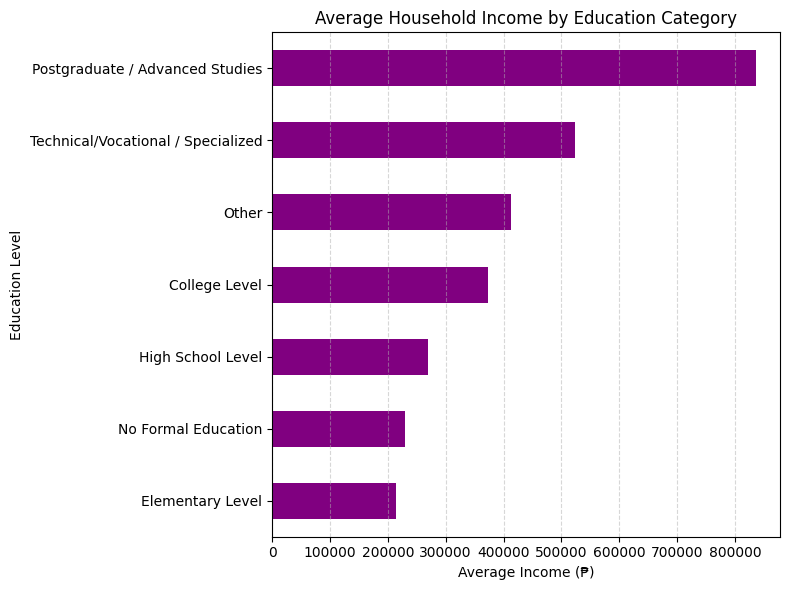

In [81]:
#Insight 16 - Visualization
def categorize_education(level):
    if level == 'No Grade Completed' or level == 'No Formal Education':
        return 'No Formal Education'
    elif level in ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Elementary Graduate']:
        return 'Elementary Level'
    elif level in ['First Year High School', 'Second Year High School', 'Third Year High School', 'High School Graduate']:
        return 'High School Level'
    elif 'College' in level or 'Post Secondary' in level:
        return 'College Level'
    elif any(x in level for x in ['Engineering', 'Health', 'Computing', 'Business', 'Teacher Training', 'Agriculture', 'Social', 'Law', 'Arts', 'Journalism', 'Mathematics', 'Architecture', 'Physical Sciences', 'Life Sciences', 'Transport', 'Security', 'Manufacturing', 'Basic']):
        return 'Technical/Vocational / Specialized'
    elif 'Post Baccalaureate' in level:
        return 'Postgraduate / Advanced Studies'
    else:
        return 'Other'
IVA_df['Edu_Category'] = IVA_df['Household Head Highest Grade Completed'].apply(categorize_education)
edu_stats_cat = IVA_df.groupby('Edu_Category')['Total Household Income'].mean().sort_values()
edu_stats_cat.plot(kind='barh', color='purple', figsize=(8,6))
plt.title('Average Household Income by Education Category')
plt.xlabel('Average Income (₱)')
plt.ylabel('Education Level')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<strong><h3>Insight No. 17</h3></strong>

<h5>Household Size and Income per Capita Relationship</h5> <hr> <p>We explored the relationship between household size and income per capita (income per family member) in Region IVA:</p> <ul> <li>As <strong>household size increases</strong>, the average income per person tends to <strong>decrease</strong>.</li> <li>This implies that larger families often have to divide their total income among more members, reducing individual financial resources.</li> </ul> <p>This insight highlights that bigger families may face more economic challenges on a per-person basis.</p>

C:\Users\DLL-Library PC01\AppData\Local\Temp\ipykernel_8612\3704520414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IVA_df['Income_per_Capita'] = IVA_df['Total Household Income'] / IVA_df['Total Number of Family members']


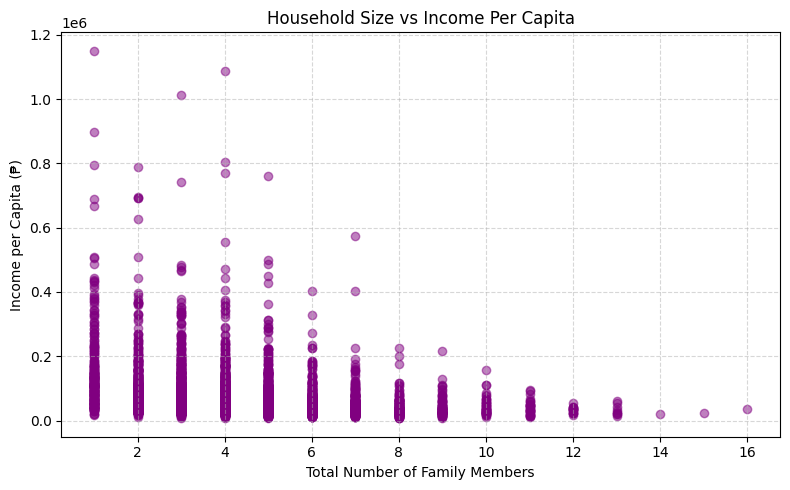

In [80]:
# Calculate income per capita
IVA_df['Income_per_Capita'] = IVA_df['Total Household Income'] / IVA_df['Total Number of Family members']

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(IVA_df['Total Number of Family members'], IVA_df['Income_per_Capita'], alpha=0.5, color='purple')
plt.title('Household Size vs Income Per Capita')
plt.xlabel('Total Number of Family Members')
plt.ylabel('Income per Capita (₱)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<strong><h3>Insight No. 18</h3></strong>

<h5>Average Household Income by Number of Employed Family Members</h5> <hr>  
<p>We examined how the number of employed family members affects the average household income in Region IVA:</p>  
<ul>  
<li>Households with <strong>more employed members</strong> tend to have higher average incomes.</li>  
<li>This trend shows that multiple earners contribute significantly to increasing a family's financial resources.</li>  
<li>Families with only one or no employed members generally have lower average incomes, indicating greater economic vulnerability.</li>  
</ul>  
<p>Overall, having more working family members appears to be a key factor in improving household economic well-being in Region IVA.</p>


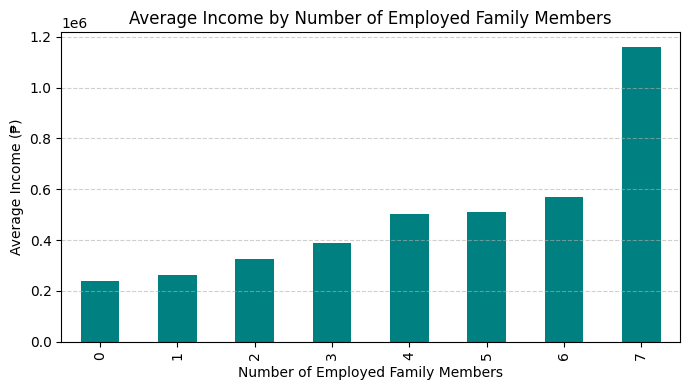

In [85]:
#Insight 18 - Visualization
income_by_employed = IVA_df.groupby('Total number of family members employed')['Total Household Income'].mean()
income_by_employed.plot(kind='bar', color='teal', figsize=(7,4))
plt.title('Average Income by Number of Employed Family Members')
plt.ylabel('Average Income (₱)')
plt.xlabel('Number of Employed Family Members')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<strong><h3>Insight No. 19</h3></strong>

<h5>Average Food Expenditure by Number of Employed Family Members and Household Head Sex</h5> <hr>

<p>This analysis looked at how food spending changes with the number of employed family members, separated by whether the household head is male or female in Region IVA.</p>

<ul>
<li>Overall, food expenditure tends to increase as more family members are employed, reflecting higher household income and possibly larger household needs.</li>
<li>Households headed by females generally spend slightly more on food compared to those headed by males, across almost all employment levels.</li>
<li>The difference in food spending between male-headed and female-headed households is more noticeable in families with fewer employed members, possibly indicating different spending priorities or household roles.</li>
</ul>

<p>This suggests that the employment status and gender of the household head both influence household food spending patterns, which is important for designing targeted social and economic programs in Region IVA.</p>


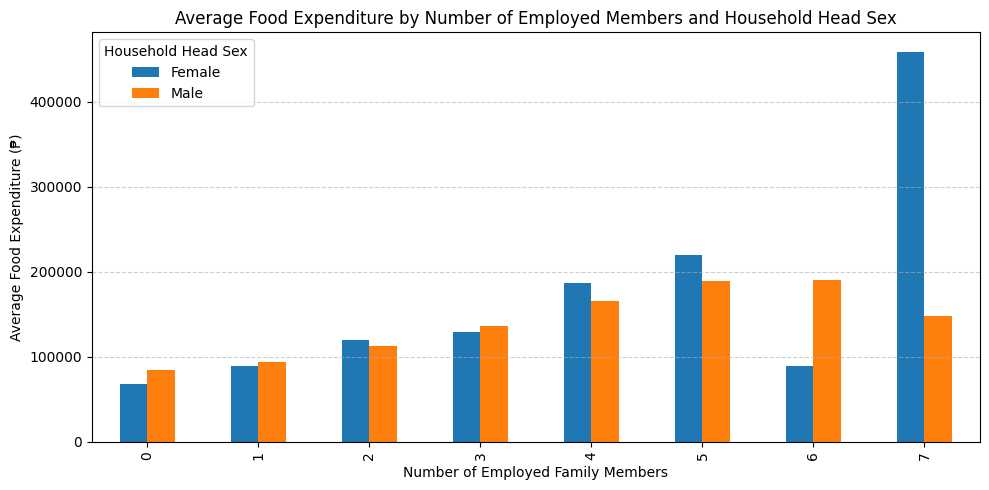

In [87]:
grouped_food_exp = IVA_df.groupby(['Total number of family members employed', 'Household Head Sex'])['Total Food Expenditure'].mean().unstack()
grouped_food_exp.plot(kind='bar', figsize=(10,5))
plt.title('Average Food Expenditure by Number of Employed Members and Household Head Sex')
plt.ylabel('Average Food Expenditure (₱)')
plt.xlabel('Number of Employed Family Members')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<strong><h3>Insight No. 20</h3></strong>

<h5>Household Head Sex Distribution in Region IVA</h5> <hr> <p>We examined the gender distribution of household heads in Region IVA using a pie chart to understand who usually leads families in the region.</p> <p>The data showed the following:</p> <ul> <li><strong>Male household heads</strong> make up the majority, accounting for a significant portion of all households.</li> <li><strong>Female household heads</strong>, while fewer in number, still represent a notable part of the population, indicating that many families are led by women, possibly due to single parenthood, widowhood, or other circumstances.</li> </ul> <p>This suggests that in Region IVA, most households are male-led, which may reflect traditional roles or economic responsibilities. However, the presence of female-headed households is also important, as it may highlight shifting social roles, women's increasing independence, or challenges faced by women managing households alone.</p> <p>Understanding this distribution can help policymakers and organizations develop programs that are gender-sensitive and responsive to the needs of both male and female household heads in the region.</p>

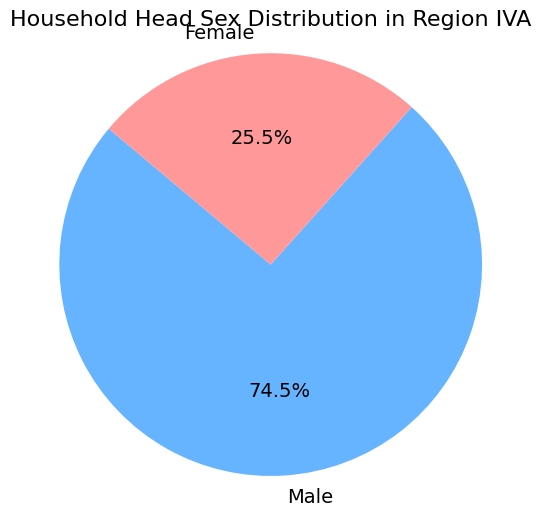

In [93]:
#Insight 20 - Visualization
sex_counts = IVA_df['Household Head Sex'].value_counts()
plt.figure(figsize=(6,6))
colors = ['#66b3ff', '#ff9999']
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title('Household Head Sex Distribution in Region IVA', fontsize=16)
plt.axis('equal')
plt.show()
